<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
FLIGHT PRICE PREDICTION MODEL END TO END PROJECT
</p>
</div>

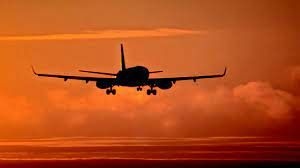

# IMPORTING LIBRARIES

In [461]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostRegressor
from sklearn.linear_model import Perceptron
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Blue;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
DESCRIPTION OF DATASET
</p>
</div>

> * **Airline:** This feature indicates the name of different Airlines.
> * **Date_Of_Journey:** This features indicates the date of the journey.
> * **Source:** This features indicates the Source from where the flight take Off.
> * **Destination:** This feature is indicating the Destination of flight.
> * **Route** This feature is indicating the Roucte of flight.
> * **Dep_Time** This feature is indicating the Departure time.
> * **Arrival_Time** This features indicates the Arrival time.
> * **Duration:** This features indicates the Duration of the flight. 
> * **Total_Stops:** This feature is showing the stops taken by flights.
> * **Additional_Info():** This features indicates the additional information about flights.
> * **Price:** This feature is indicating the Price of the flights.

In [462]:
train=pd.read_excel("Data_Train.xlsx")

In [463]:
test=pd.read_excel("Test_set.xlsx")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:orange;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
BASIC UNDERSTANDING OF TRAIN & TEST DATA
</p>
</div>

In [464]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [466]:
train.shape

(10799, 11)

In [467]:
test.shape

(2671, 10)

In [468]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 928.2+ KB


In [469]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [470]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [471]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [472]:
train.isnull().sum()

Airline            116
Date_of_Journey    116
Source             116
Destination        116
Route              117
Dep_Time           116
Arrival_Time       116
Duration           116
Total_Stops        117
Additional_Info    116
Price              116
dtype: int64

In [473]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [474]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [475]:
train.dropna(inplace = True)

In [476]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [477]:
# Now DATA is clean 

In [478]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229.0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Lightblue;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
EXPLORATORY DATA ANALYSIS
</p>
</div>

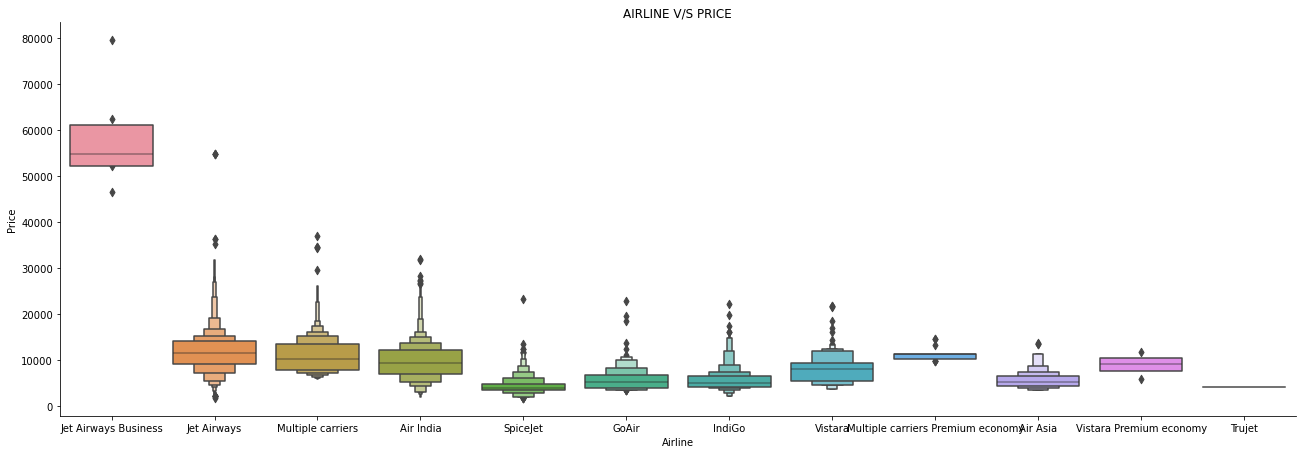

In [479]:
sns.catplot(x='Airline', y = "Price", data=train.sort_values("Price",ascending = False), kind="boxen", height=6 ,aspect= 3).set(title='AIRLINE V/S PRICE')
plt.show()

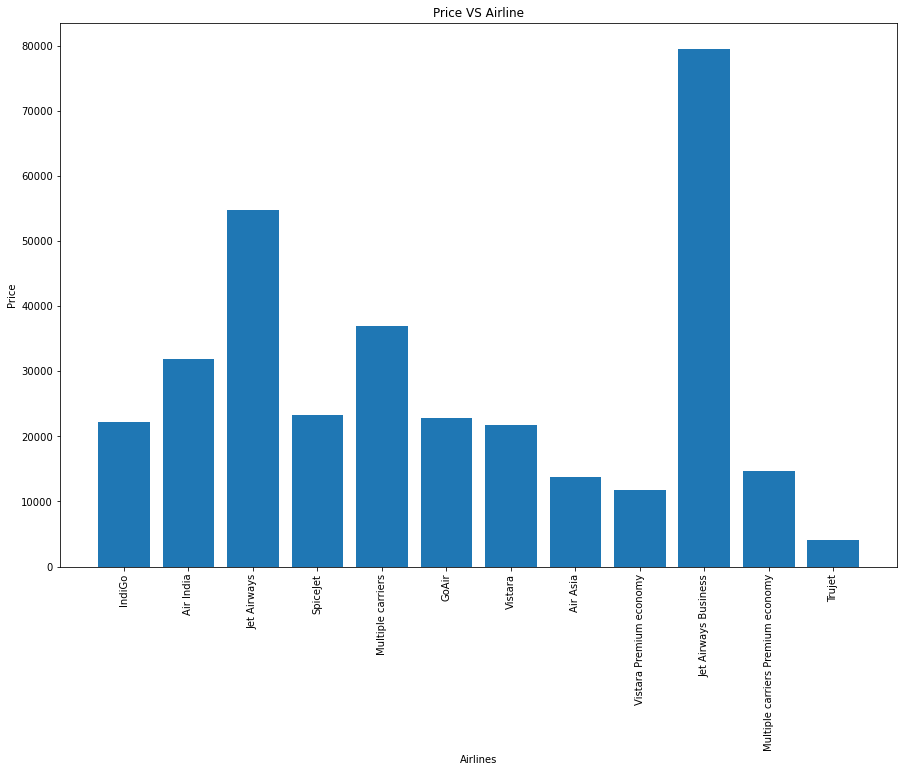

In [480]:
plt.figure(figsize=(15,10))
plt.title("Price VS Airline")
plt.bar(train['Airline'],train['Price'])
plt.xlabel("Airlines")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [481]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

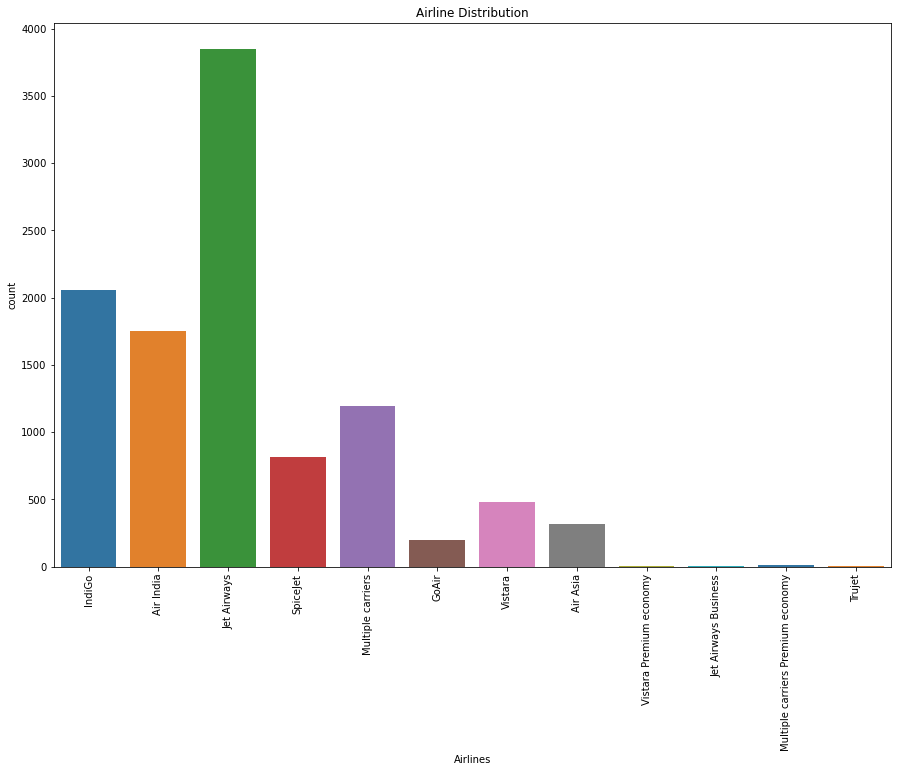

In [482]:
plt.figure(figsize=(15,10))
plt.title("Airline Distribution")
sns.countplot(x='Airline',palette='tab10',data=train)
plt.xlabel("Airlines")
plt.xticks(rotation=90)
plt.show()

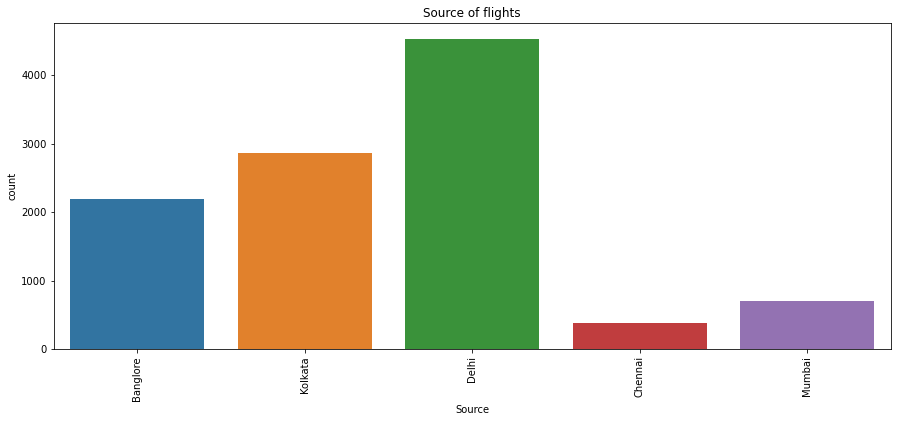

In [483]:
plt.figure(figsize=(15,6))
plt.title("Source of flights")
sns.countplot(x='Source',palette="tab10",data=train)
plt.xlabel("Source")
plt.xticks(rotation=90)
plt.show()

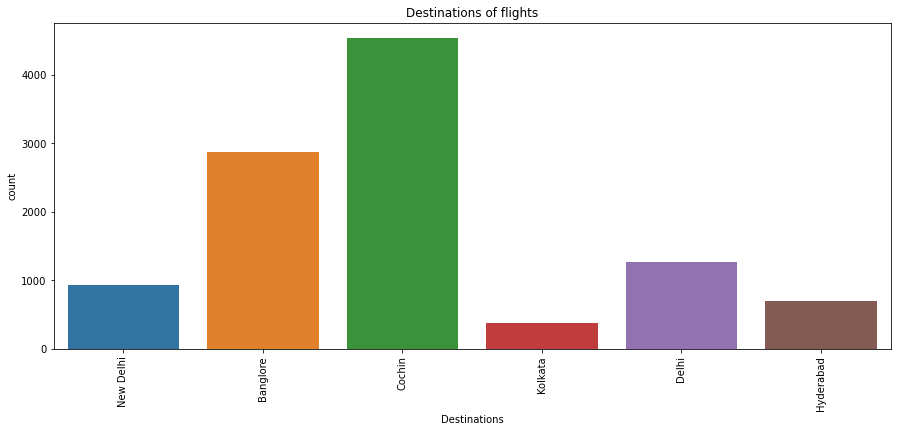

In [484]:
plt.figure(figsize=(15,6))
plt.title("Destinations of flights")
sns.countplot(x='Destination',palette="tab10",data=train)
plt.xlabel("Destinations")
plt.xticks(rotation=90)
plt.show()

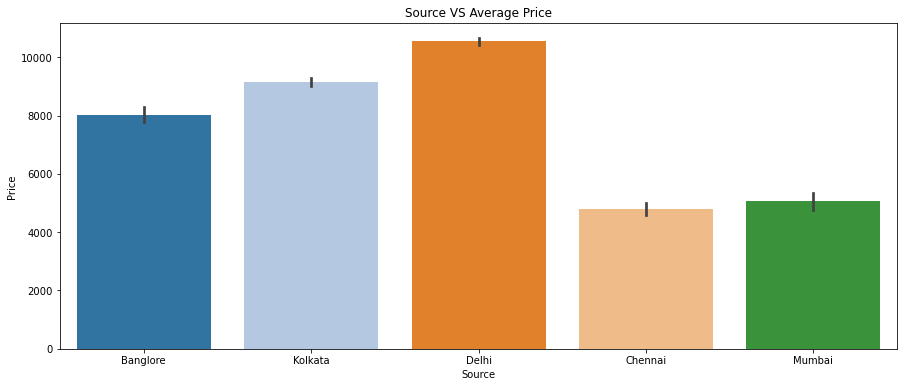

In [485]:
plt.figure(figsize=(15,6))
plt.title("Source VS Average Price")
sns.barplot(x='Source',y='Price',palette="tab20",data=train)
plt.show()

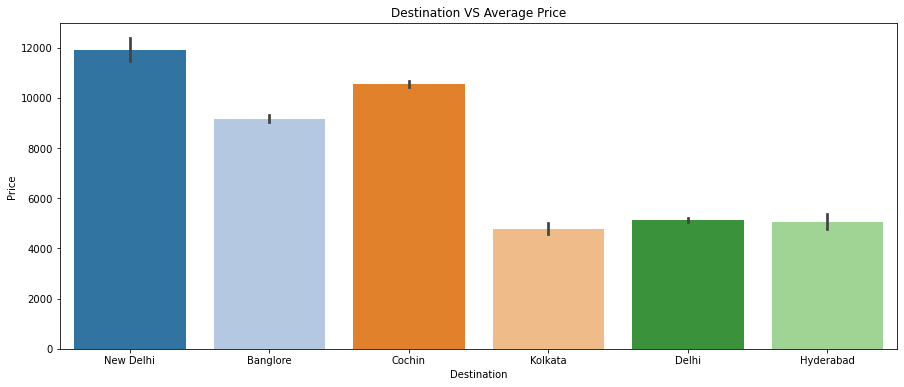

In [486]:
plt.figure(figsize=(15,6))
plt.title("Destination VS Average Price")
sns.barplot(x='Destination',y='Price',palette="tab20",data=train)
plt.show()

In [487]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

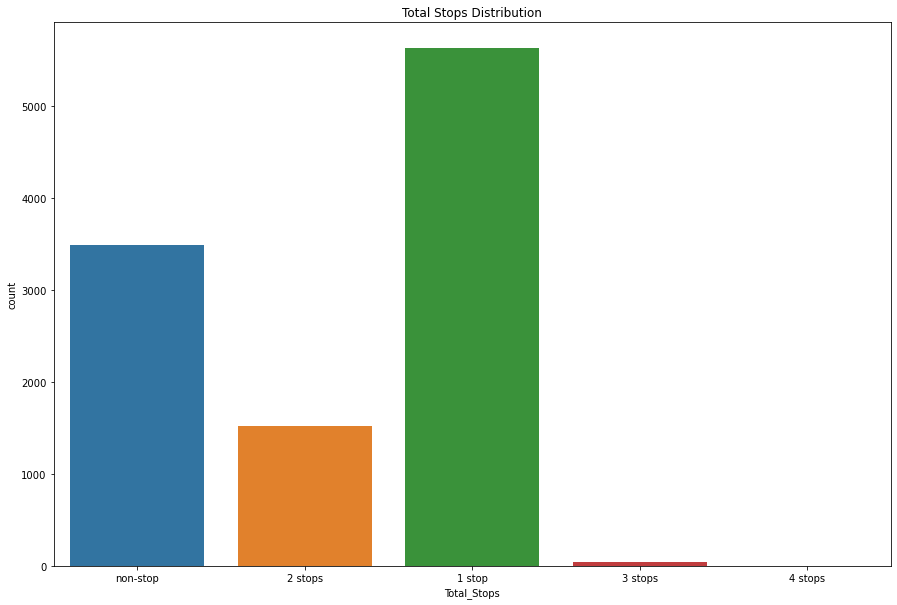

In [488]:
plt.figure(figsize=(15,10))
plt.title("Total Stops Distribution")
sns.countplot(x='Total_Stops',palette="tab10",data=train)
plt.show()

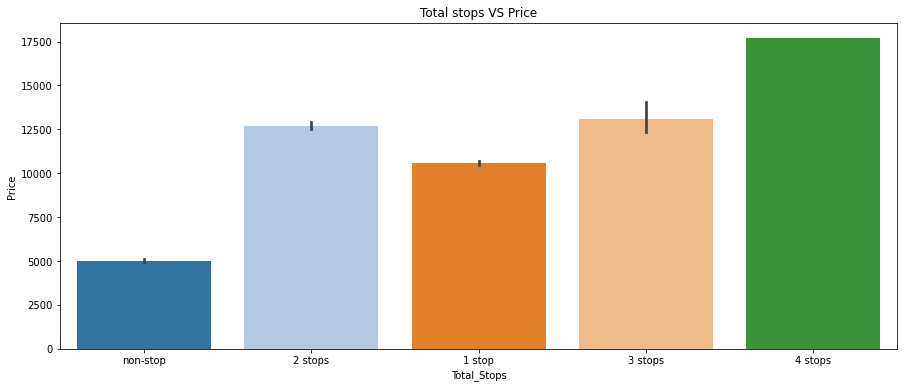

In [489]:
plt.figure(figsize=(15,6))
plt.title("Total stops VS Price")
sns.barplot(x='Total_Stops',y='Price',palette="tab20",data=train)
plt.show()

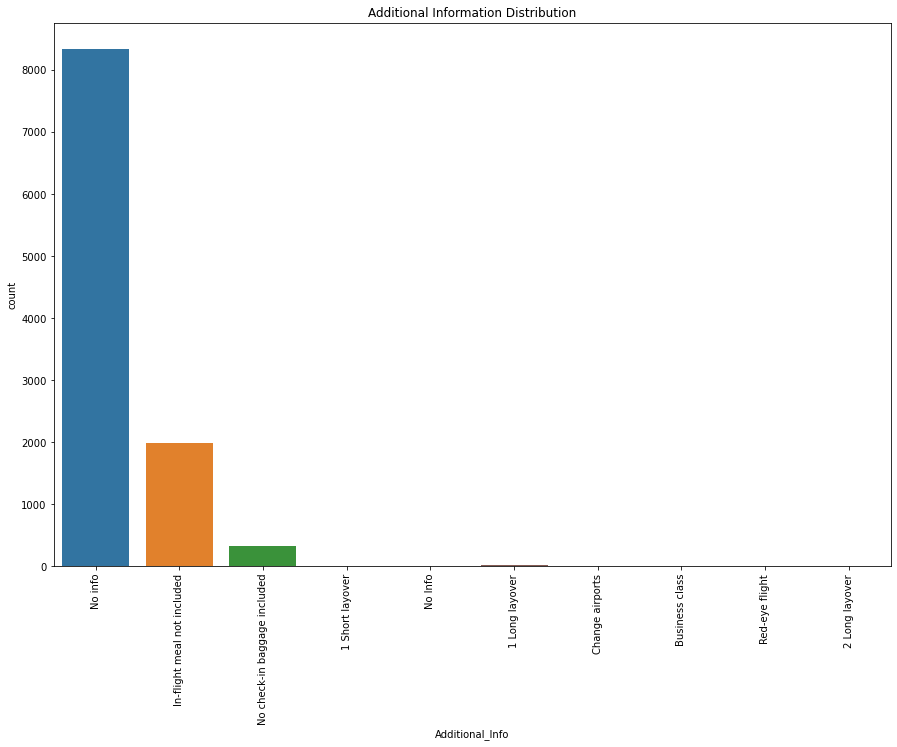

In [490]:
plt.figure(figsize=(15,10))
plt.title("Additional Information Distribution")
sns.countplot(x='Additional_Info',palette="tab10",data=train)
plt.xticks(rotation=90)
plt.show()

SOME CONCLUSIONS:

Most prices are in a range of up to 20000, but outliers are present.

Jet Airways is the most frequent airline. However, Jet Airways Business has an average price much higher than the other lines.

Delhi is where most flights depart from and has the highest average price.

Cochin is the destination with the highest number of flights. However, New Delhi is the destination with the highest average price.

A little more than half of the flights have only one stop and the greater the number of stops, the higher the average price.

In the information column, the vast majority do not contain information and the rest are not relevant to the model.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Green;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
FEATURE ENGINEERING
</p>
</div>

In [491]:
df=train.append(test)

In [492]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [493]:
df['Journey_day']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [494]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3


In [495]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [496]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,20,30
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,14,20
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,21,50
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,4,0


In [497]:
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [498]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,20,30,20,25
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,14,20,16,55
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,21,50,4,25
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,4,0,19,15


In [499]:
df['Total_Stops'].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)

In [500]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,NaN,6,6,20,30,20,25
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,NaN,27,3,14,20,16,55
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,NaN,6,3,21,50,4,25
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,NaN,6,3,4,0,19,15


In [501]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extract hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    # Extracts only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [502]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [503]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,NaN,6,6,20,30,20,25,23,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,0,No info,NaN,27,3,14,20,16,55,2,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,NaN,6,3,21,50,4,25,6,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,NaN,6,3,4,0,19,15,15,15


In [504]:
df=pd.get_dummies(columns=['Airline','Source','Destination'],data=df)

In [505]:
df

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,...,0,0,1,0,1,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6,...,0,1,0,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,...,0,0,1,0,1,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,6/06/2019,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1,No info,NaN,6,6,...,0,0,1,0,1,0,0,0,0,0
2667,27/03/2019,CCU → BLR,14:20,16:55,2h 35m,0,No info,NaN,27,3,...,0,0,1,0,1,0,0,0,0,0
2668,6/03/2019,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info,NaN,6,3,...,0,1,0,0,0,1,0,0,0,0
2669,6/03/2019,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info,NaN,6,3,...,0,1,0,0,0,1,0,0,0,0


In [506]:
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],inplace=True)

In [507]:
df.drop(columns=['Additional_Info'],inplace=True)

In [508]:
df

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882.0,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302.0,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,6,6,20,30,20,25,23,55,...,0,0,1,0,1,0,0,0,0,0
2667,0,NaN,27,3,14,20,16,55,2,35,...,0,0,1,0,1,0,0,0,0,0
2668,1,NaN,6,3,21,50,4,25,6,35,...,0,1,0,0,0,1,0,0,0,0
2669,1,NaN,6,3,4,0,19,15,15,15,...,0,1,0,0,0,1,0,0,0,0


In [509]:
train=df[~df['Price'].isnull()]

In [510]:
train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882.0,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302.0,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.0,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145.0,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229.0,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648.0,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [511]:
test=df[df['Price'].isnull()]

In [512]:
test

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,NaN,6,6,17,30,4,25,10,55,...,0,1,0,0,0,1,0,0,0,0
1,1,NaN,12,5,6,20,10,20,4,0,...,0,0,1,0,1,0,0,0,0,0
2,1,NaN,21,5,19,15,19,0,23,45,...,0,1,0,0,0,1,0,0,0,0
3,1,NaN,21,5,8,0,21,0,13,0,...,0,1,0,0,0,1,0,0,0,0
4,0,NaN,24,6,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,NaN,6,6,20,30,20,25,23,55,...,0,0,1,0,1,0,0,0,0,0
2667,0,NaN,27,3,14,20,16,55,2,35,...,0,0,1,0,1,0,0,0,0,0
2668,1,NaN,6,3,21,50,4,25,6,35,...,0,1,0,0,0,1,0,0,0,0
2669,1,NaN,6,3,4,0,19,15,15,15,...,0,1,0,0,0,1,0,0,0,0


Now Data is ready for machine learning Algorithms

In [513]:
train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882.0,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302.0,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107.0,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145.0,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229.0,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648.0,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [514]:
x=train.drop(columns=['Price'])
y=train['Price']

In [515]:
x

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,1,...,0,0,1,0,1,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,0,...,0,0,1,0,1,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [516]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [517]:
# splitting

In [518]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [519]:
# Scalling

In [520]:
sd=StandardScaler()
x_scaled=sd.fit_transform(x)

In [521]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=20)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
MODEL BUILDING FOR SCALED DATA
</p>
</div>

In [522]:
training_score=[]
testing_score=[]

In [523]:
def scaled_model(model):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    y_pred_train=model.predict(x_train1)
    a=r2_score(y_pred,y_test1)*100
    b=r2_score(y_pred_train,y_train1)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"mean_squared_error of {model} model is:",mean_squared_error(y_test1,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"mean_absolute_error of {model} model is:",mean_absolute_error(y_test1,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"rmse {model} model is:",0.5**mean_squared_error(y_test1,y_pred))
    print("\n------------------------------------------------------------------------")

In [524]:
scaled_model(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: -0.0468164794012349
r2_Score of LinearRegression() model on Testing Data is: 40.462357787295

------------------------------------------------------------------------
mean_squared_error of LinearRegression() model is: 2.567855105784923e+33

------------------------------------------------------------------------
mean_absolute_error of LinearRegression() model is: 1096182832360851.2

------------------------------------------------------------------------
rmse LinearRegression() model is: 0.0

------------------------------------------------------------------------


In [526]:
scaled_model(KNeighborsRegressor())

r2_Score of KNeighborsRegressor() model on Training Data is: 68.94425643920952
r2_Score of KNeighborsRegressor() model on Testing Data is: 80.50142913113515

------------------------------------------------------------------------
mean_squared_error of KNeighborsRegressor() model is: 5164210.533888629

------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() model is: 1430.1713617220403

------------------------------------------------------------------------
rmse KNeighborsRegressor() model is: 0.0

------------------------------------------------------------------------


In [545]:
scaled_model(SVR())

r2_Score of SVR() model on Training Data is: -19149.568353490842
r2_Score of SVR() model on Testing Data is: -18856.427954156472

------------------------------------------------------------------------
mean_squared_error of SVR() model is: 19399084.30246376

------------------------------------------------------------------------
mean_absolute_error of SVR() model is: 3339.5670381955883

------------------------------------------------------------------------
rmse SVR() model is: 0.0

------------------------------------------------------------------------


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
MODEL BUILDING FOR UNSCALED DATA
</p>
</div>

In [543]:
def Unscaled_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
#     model.score(y_pred,y_test)
#     model.score(y_pred_train,y_train)
    a=r2_score(y_pred,y_test)*100
    b=r2_score(y_pred_train,y_train)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"mean_squared_error of {model} model is:",mean_squared_error(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"mean_absolute_error of {model} model is:",mean_absolute_error(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"rmse {model} model is:",0.5**mean_squared_error(y_test,y_pred))
    print("\n------------------------------------------------------------------------")

In [544]:
Unscaled_model(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 71.46717995762376
r2_Score of RandomForestRegressor() model on Testing Data is: 95.0597688978685

------------------------------------------------------------------------
mean_squared_error of RandomForestRegressor() model is: 5013729.523237872

------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() model is: 1226.597654861153

------------------------------------------------------------------------
rmse RandomForestRegressor() model is: 0.0

------------------------------------------------------------------------


In [530]:
Unscaled_model(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 60.844383195720276
r2_Score of DecisionTreeRegressor() model on Testing Data is: 96.92060154479549

------------------------------------------------------------------------
mean_squared_error of DecisionTreeRegressor() model is: 8003874.139206312

------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() model is: 1455.7021837466855

------------------------------------------------------------------------
rmse DecisionTreeRegressor() model is: 0.0

------------------------------------------------------------------------


In [546]:
Unscaled_model(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: -12.113557928102136
r2_Score of AdaBoostRegressor() model on Testing Data is: -7.233854904906667

------------------------------------------------------------------------
mean_squared_error of AdaBoostRegressor() model is: 11496697.09278638

------------------------------------------------------------------------
mean_absolute_error of AdaBoostRegressor() model is: 2701.398266570926

------------------------------------------------------------------------
rmse AdaBoostRegressor() model is: 0.0

------------------------------------------------------------------------


In [532]:
Unscaled_model(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 67.52985976131026
r2_Score of GradientBoostingRegressor() model on Testing Data is: 70.24145981418476

------------------------------------------------------------------------
mean_squared_error of GradientBoostingRegressor() model is: 4713791.062583997

------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() model is: 1552.037917066682

------------------------------------------------------------------------
rmse GradientBoostingRegressor() model is: 0.0

------------------------------------------------------------------------


In [533]:
Unscaled_model(LGBMRegressor())

r2_Score of LGBMRegressor() model on Training Data is: 76.35765020440985
r2_Score of LGBMRegressor() model on Testing Data is: 84.54146625480084

------------------------------------------------------------------------
mean_squared_error of LGBMRegressor() model is: 3940992.070016604

------------------------------------------------------------------------
mean_absolute_error of LGBMRegressor() model is: 1279.0761564672146

------------------------------------------------------------------------
rmse LGBMRegressor() model is: 0.0

------------------------------------------------------------------------


In [534]:
Unscaled_model(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 79.23676004280253
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [535]:
Unscaled_model(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x000002E24FAADEB0> model on Training Data is: 81.2978605560323
r2_Score of <catboost.core.CatBoostRegressor object at 0x000002E24FAADEB0> model on Testing Data is: 90.29742586125462

------------------------------------------------------------------------
mean_squared_error of <catboost.core.CatBoostRegressor object at 0x000002E24FAADEB0> model is: 3318866.1127231126

------------------------------------------------------------------------
mean_absolute_error of <catboost.core.CatBoostRegressor object at 0x000002E24FAADEB0> model is: 1208.110047257366

------------------------------------------------------------------------
rmse <catboost.core.CatBoostRegressor object at 0x000002E24FAADEB0> model is: 0.0

------------------------------------------------------------------------


In [536]:
Models = ["Linear Regression","KNN","Random Forest","Decision Tree",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [537]:
df=pd.DataFrame({"Algorithms":Models,"Training Score":training_score,"Testing Score": testing_score})

In [538]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,-0.046816,40.462358
1,KNN,68.944256,80.501429
2,Random Forest,72.219384,95.060352
3,Decision Tree,60.844383,96.920602
4,Gradient Boost,67.529860,70.241460
5,LGBM,76.357650,84.541466
6,XGBoost,79.236760,93.005355
7,CatBoost,81.297861,90.297426


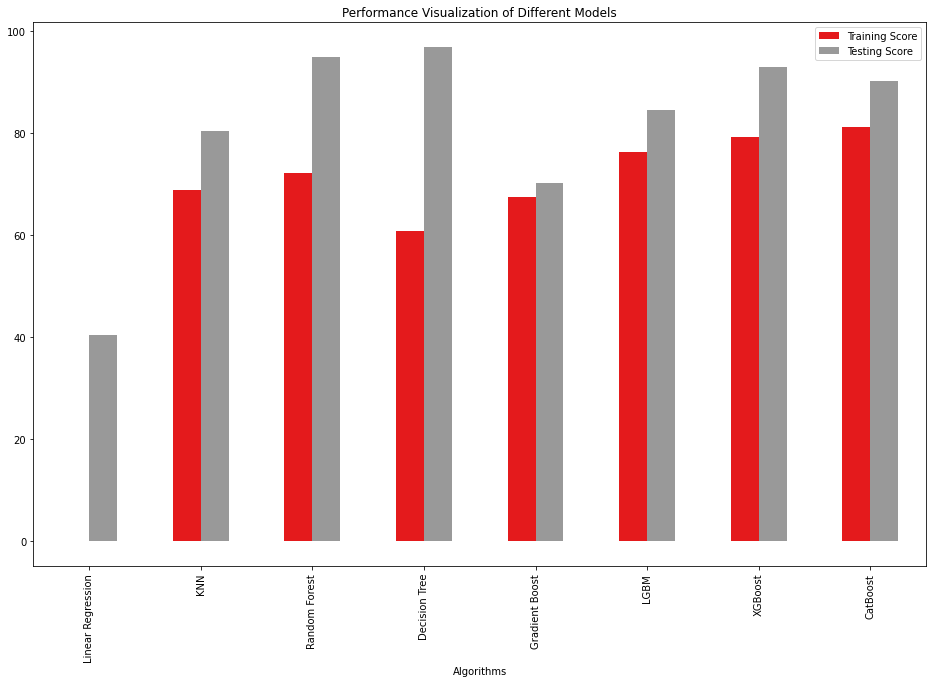

In [539]:
df.plot(x='Algorithms',y=['Training Score','Testing Score'],colormap='Set1',figsize=(16,10),kind="bar", title="Performance Visualization of Different Models");

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 Highest performance was give by Decision Tree Regressor approx 97%.<br>

💡 Second Highest performance was given by Random Forest approx 95%----Xgboost, Catboost was also good and have above 90%<br>

💡 So we will do Hyper-Parameter Tunning on these four Models.<br></div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:Purple;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
HYPERPARAMETER TUNNING
</p>
</div>

Hyperparmaeter tunning for decision Tree Regressor

In [553]:
Model0=DecisionTreeRegressor()

In [560]:
parameters0={'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter':['best','random'],
    'max_depth':range(1,20,1),
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(4,10,1) 
}

In [561]:
grid_search0=GridSearchCV(estimator=Model0,param_grid=parameters0,cv=5,n_jobs=-1)

In [562]:
grid_search0.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [563]:
grid_search0.best_score_

0.7958746604161449

In [564]:
best_parameters = grid_search0.best_params_
best_parameters

{'criterion': 'friedman_mse',
 'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [565]:
# Creating Decision Tree Model Using Best Parameters.

In [566]:
Model0=DecisionTreeRegressor(**best_parameters)

In [567]:
Model0.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=4)

In [570]:
y_pred=Model0.predict(x_test)

In [571]:
y_pred_train=Model0.predict(x_train)

In [581]:
r2_score(y_test,y_pred)*100

73.71677760600886

In [582]:
r2_score(y_train,y_pred_train)*100

87.24031630350663

Hyperparmaeter tunning for Random Foresrt Regressor

In [585]:
model1 = RandomForestRegressor()

In [586]:
parameters4 = {'n_estimators': [50,150,200,250],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}
    

In [589]:
grid_search1 = GridSearchCV(model1, parameters4, cv=5, n_jobs=-1)

In [590]:
grid_search1.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [50, 150, 200, 250]})

In [592]:
grid_search1.best_score_

0.8090550618269379

In [595]:
best_parameters4 = grid_search1.best_params_
best_parameters4

{'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [596]:
# Creating Random Forest Model Using Best Parameters

In [598]:
model1 = RandomForestRegressor(**best_parameters4)

In [601]:
model1.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=200)

In [602]:
y_pred = model1.predict(x_test)

In [603]:
y_pred_train = model1.predict(x_train)

In [610]:
r2_score(y_test,y_pred)

0.7867993060711909

In [606]:
r2_score(y_train,y_pred_train)

0.8844253435449165

Hyperparmaeter tunning for XGBoostRegressor

In [611]:
model3 = XGBRegressor()

In [612]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [613]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [614]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [615]:
grid_search3.best_score_

0.8344851389040594

In [616]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.3, 'n_estimators': 100, 'random_state': 0}

In [617]:
# Creating XGBoost Model Using Best Parameters

In [618]:
model3 = XGBRegressor(**best_parameters3)

In [619]:
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [620]:
y_pred = model3.predict(x_test)

In [621]:
y_pred_train = model3.predict(x_train)

In [622]:
r2_score(y_test,y_pred)

0.8185257021036603

In [623]:
r2_score(y_train,y_pred_train)

0.9368664863916717

Hyperparmaeter tunning for CatboostRegressor

In [624]:
model2 = CatBoostRegressor(verbose=False)

In [625]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [626]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [627]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002E25600F190>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [628]:
grid_search2.best_score_

0.8308304192622711

In [629]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 50, 'learning_rate': 0.5, 'random_state': 50}

In [630]:
# Creating Cat Boost Model Using Best Parameters

In [631]:
model2 = CatBoostRegressor(**best_parameters2,verbose=False)

In [632]:
model2.fit(x_train,y_train)

In [633]:
y_pred = model2.predict(x_test)

In [634]:
y_pred_train=model2.predict(x_train)

In [635]:
r2_score(y_test,y_pred)

0.8169230974511442

In [636]:
r2_score(y_train,y_pred_train)

0.9085737971368016

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
THANK YOU SO MUCH FOR READING MY NOTEBOOK!
</p>
</div>